<a href="https://colab.research.google.com/github/trifarameliniaa/Belajar_AI/blob/main/Preprocessing_ASL_TA_ORBIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from time import time
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train'
test_dir = '/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_test'

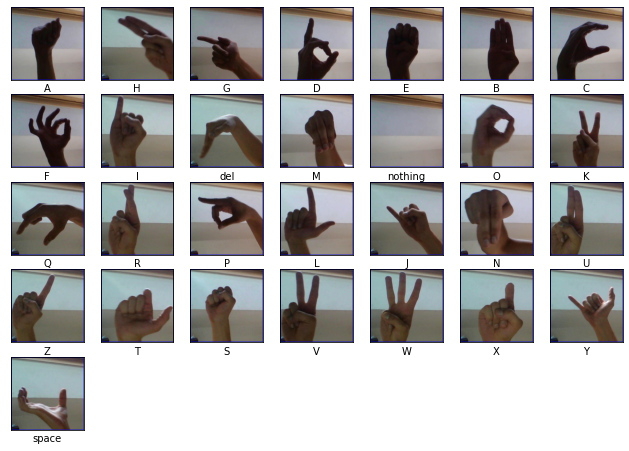

In [ ]:
classes = os.listdir(base_dir)

plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = base_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [ ]:
def load_data(base_dir):
    images = []
    labels = []
    size = 64,64
    index = -1
    for folder in os.listdir(base_dir):
        index +=1
        for image in os.listdir(base_dir + "/" + folder):
            temp_img = cv2.imread(base_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25) #memisahkan data yang akan dilatih dan diuji dengan data ujinya sebesar 25% dari jumlah data keseluruhan
    
    #Menampilkan jumlah data yang akan dilatih dan diuji
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(base_dir)
print('Loading:', time() - start)

Loaded 65250 images for training, Train data shape = (65250, 64, 64, 3)
Loaded 21750 images for testing Test data shape = (21750, 64, 64, 3)
Loading: 400.40773367881775


###**Arsitektur**

In [ ]:
# x_test = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/x_test1.npy')
# x_train = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/x_train1.npy')
# y_test = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/y_test1.npy')
# y_train = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/y_train1.npy')

In [ ]:
classes = 29
batch = 64
epochs = 10
learning_rate = 0.005

def results(model):
  adam = Adam(lr=learning_rate)

  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  start = time()
  history = model.fit(x_train,
                      y_train,
                      batch_size=batch,
                      epochs=epochs,
                      validation_split=0.20,
                      shuffle = True, verbose=1)
  train_time = time() - start

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
816/816 [==============================] - 34s 27ms/step - loss: 1.9600 - accuracy: 0.4301 - val_loss: 2.6596 - val_accuracy: 0.3696
Epoch 2/10
816/816 [==============================] - 22s 27ms/step - loss: 0.7706 - accuracy: 0.7498 - val_loss: 4.3119 - val_accuracy: 0.2920
Epoch 3/10
816/816 [==============================] - 22s 27ms/step - loss: 0.4897 - accuracy: 0.8359 - val_loss: 0.6951 - val_accuracy: 0.7851
Epoch 4/10
816/816 [==============================] - 20s 25ms/step - loss: 0.3798 - accuracy: 0.8716 - val_loss: 1.6770 - val_accuracy: 0.6369
Epoch 5/10
816/816 [==============================] - 20s 25ms/step - loss: 0.3436 - accuracy: 0.8868 - val_loss: 1.0933 - val_accuracy: 0.7349
Epoch 6/10
816/816 [==============================] - 22s 27ms/step - loss: 0.3324 - accuracy: 0.8926 - val_loss: 0.3403 - val_accuracy: 0.8917
Epoch 7/10
816/816 [==============================] - 21s 25ms/step - loss: 0.3115 - accuracy: 0.8995 - val_loss: 0.2710 - val_accuracy:

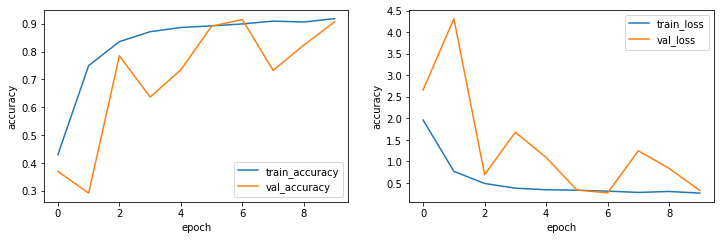

680/680 [==============================] - 4s 5ms/step - loss: 0.3245 - accuracy: 0.9058

Train time:  265.08041763305664
Test accuracy: 0.9057931303977966
Test loss: 0.32447001338005066
Test time:  6.346813201904297


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)